## Ising Model

Program to simulate the two-dimensional Ising model on a square lattice with periodic boundary conditions using the Metropolis algorithm with local spin flips.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [205]:
# Define a class for the Ising Model lattice including metropolis local spin change algorithm
class ising_model_lattice:
    
    n = 0
    lattice = 0
    k_B = 1.3806488e-23 # J/K
    T = 1 # Units: K
    
    def __init__(self, length=100, temp=1):
        self.n = length
        self.lattice = 2*np.random.randint(2, size=(self.n,self.n))-1 # Use bits instead of ints
        self.T = temp
        
    def dE(self, x, y): # dE as energy difference
        neighbors = self.lattice[(x+1)%self.n,y] + self.lattice[x,(y+1)%self.n] + self.lattice[x-1,y] + self.lattice[x,y-1]
        return 2*neighbors*self.lattice[x,y]
    
    def energy(self): # Total energy
        energy = 0
        for i in range(self.n):
            for j in range(self.n):
                energy += self.dE(i,j)
        return energy
    
    def magnetization(self):
        return np.sum(self.lattice)/(self.n**2) #Normalization?
    
    def metropolis_local_flip(self):
        lattice = self.lattice
        for i in range(self.n):
            for j in range(self.n):
                dE = self.dE(i,j)
                if dE<0:
                    lattice[i,j] *= -1
                elif np.random.rand()<np.exp(-dE/(self.T)): # Fallunterscheidung to improve performance
                    lattice[i,j] *= -1
        self.lattice = lattice
                    
    def show_state(self):
        plt.figure()
        plt.imshow(self.lattice)
        plt.colorbar()
        plt.show()
                    

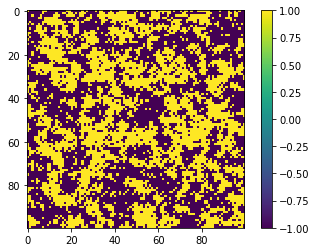

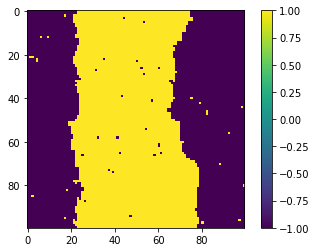

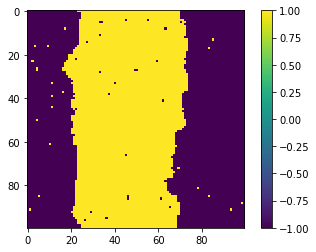

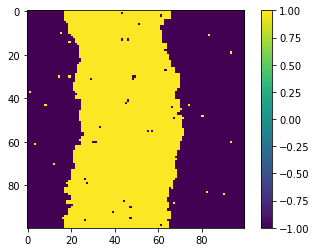

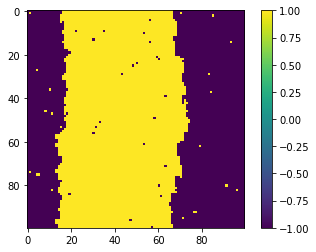

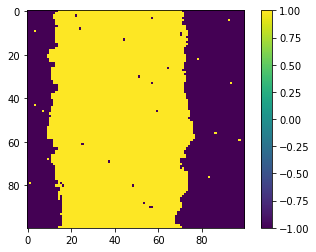

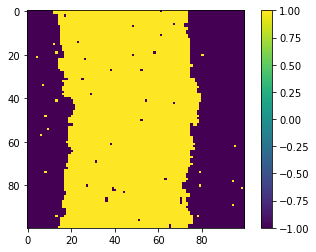

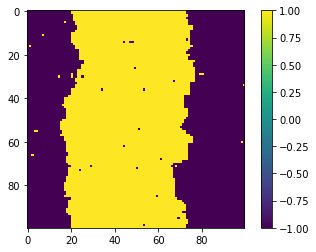

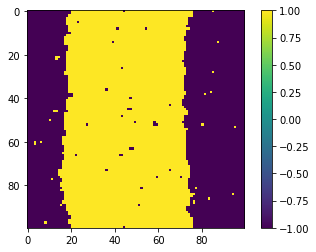

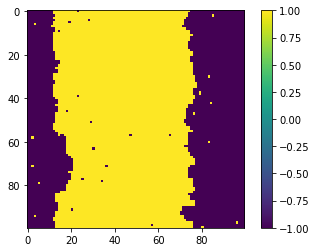

In [206]:
obj = ising_model_lattice(temp=1.4)
for i in range(1000):
    obj.metropolis_local_flip()
    if (i%100)==0:
        obj.show_state()

In [215]:
# Find critical temperature
T = np.linspace(1.5, 3.5,20);

obj_list = []
mag = []
for i in range(T.size):
    obj_list.append(ising_model_lattice(temp=T[i]))
    for j in range(1000):
        obj_list[i].metropolis_local_flip()
    mag.append(obj_list[i].magnetization())

mag = np.array(mag)





  0%|          | 0/20 [00:00<?, ?it/s]



  5%|▌         | 1/20 [01:03<19:57, 63.05s/it]



 10%|█         | 2/20 [02:05<18:53, 62.95s/it]



 15%|█▌        | 3/20 [03:07<17:42, 62.52s/it]



 20%|██        | 4/20 [04:09<16:39, 62.48s/it]



 25%|██▌       | 5/20 [05:11<15:34, 62.29s/it]



 30%|███       | 6/20 [06:13<14:30, 62.21s/it]



 35%|███▌      | 7/20 [07:15<13:27, 62.10s/it]



 40%|████      | 8/20 [08:16<12:22, 61.87s/it]



 45%|████▌     | 9/20 [09:17<11:15, 61.43s/it]



 50%|█████     | 10/20 [10:17<10:09, 60.98s/it]



 55%|█████▌    | 11/20 [11:16<09:05, 60.62s/it]



 60%|██████    | 12/20 [12:17<08:04, 60.59s/it]



 65%|██████▌   | 13/20 [13:17<07:03, 60.44s/it]



 70%|███████   | 14/20 [14:17<06:01, 60.18s/it]



 75%|███████▌  | 15/20 [15:16<04:59, 59.92s/it]



 80%|████████  | 16/20 [16:16<03:59, 59.97s/it]



 85%|████████▌ | 17/20 [17:16<02:59, 59.87s/it]



 90%|█████████ | 18/20 [18:15<01:59, 59.76s/it]



 95%|█████████▌| 19/20 [19:14<00:59, 59.56s/i

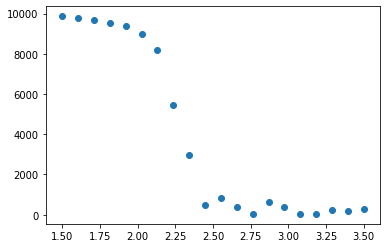

In [216]:
fig = plt.figure()
plt.scatter(T, np.abs(mag), marker='o')
plt.show()

$T_c$ is around $T = 2.5$ in the unspecified used units (not Kelvin). 